In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_observations = pd.read_csv('observations.csv')
df_species = pd.read_csv('species_info.csv')
print(df_observations.dtypes)


scientific_name    object
park_name          object
observations        int64
dtype: object


In [3]:
df_species.rename(columns={'conservation_status': 'status'}, inplace=True)
print(df_species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names status  
0                           Gapper's Red-Backed Vole    NaN  
1                              American Bison, Bison    NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...    NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)    NaN  
4                                      Wapiti Or Elk    NaN  


In [4]:
status = df_species.status.unique()
print(status)

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [6]:
species_of_concern = df_species[df_species['status'] == 'Species of Concern'].reset_index()
endangered = df_species[df_species['status'] == 'Endangered'].reset_index()
threatened = df_species[df_species['status'] == 'Threatened'].reset_index()
in_recovery = df_species[df_species['status'] == 'In Recovery'].reset_index()
print(in_recovery.head())

   index category           scientific_name               common_names  \
0    100     Bird  Haliaeetus leucocephalus                 Bald Eagle   
1   3020   Mammal               Canis lupus            Gray Wolf, Wolf   
2   3143     Bird   Falco peregrinus anatum  American Peregrine Falcon   
3   4565     Bird    Pelecanus occidentalis              Brown Pelican   

        status  
0  In Recovery  
1  In Recovery  
2  In Recovery  
3  In Recovery  


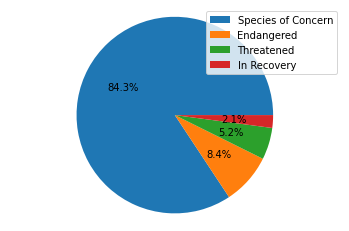

In [7]:
num_of_unexposed = len(df_species) - (len(species_of_concern) + len(endangered) + len(threatened) + len(in_recovery))
animal_status_num = [len(species_of_concern), len(endangered), len(threatened), len(in_recovery)]
animal_status = ['Species of Concern', 'Endangered', 'Threatened', 'In Recovery']

plt.pie(animal_status_num, autopct='%0.1f%%')
plt.axis('equal')
plt.legend(animal_status)
plt.show()

In [8]:
print(df_species.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [43]:
print(df_species.groupby('status').category.count().reset_index())

               status  category
0          Endangered        16
1         In Recovery         4
2  Species of Concern       161
3          Threatened        10


In [44]:
df_species.fillna('No Intervention', inplace=True)

In [45]:
print(df_species.groupby('status').category.count().reset_index())

               status  category
0          Endangered        16
1         In Recovery         4
2     No Intervention      5633
3  Species of Concern       161
4          Threatened        10


In [47]:
protection_counts = df_species.groupby('status').scientific_name.nunique().reset_index().sort_values(by='scientific_name')
print(protection_counts)

               status  scientific_name
1         In Recovery                4
4          Threatened               10
0          Endangered               15
3  Species of Concern              151
2     No Intervention             5363


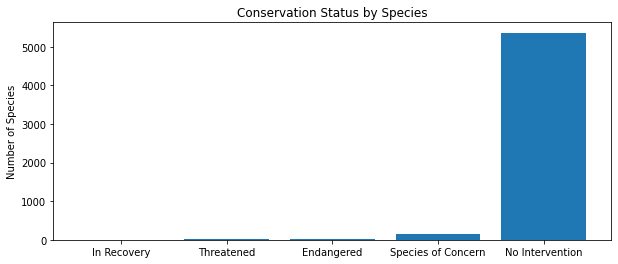

In [48]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
plt.bar(range(len(protection_counts['scientific_name'])), protection_counts['scientific_name'])
ax.set_xticks(range(len(protection_counts['scientific_name'])))
ax.set_xticklabels(protection_counts['status'])
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.show()

In [49]:
df_species['is_protected'] = df_species['status'].apply(lambda x: True if x != 'No Intervention' else False)

In [50]:
category_counts = df_species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()

In [51]:
print(category_counts.head())

    category  is_protected  scientific_name
0  Amphibian         False               72
1  Amphibian          True                7
2       Bird         False              413
3       Bird          True               75
4       Fish         False              115


In [52]:
category_pivot = category_counts.pivot(columns = 'is_protected', index='category', values='scientific_name').reset_index()

In [53]:
print(category_pivot.head())

is_protected           category  False  True
0                     Amphibian     72     7
1                          Bird    413    75
2                          Fish    115    11
3                        Mammal    146    30
4             Nonvascular Plant    328     5


In [55]:
category_pivot.columns = ['category', 'not_protected', 'is_protected']
print(category_pivot.head())

            category  not_protected  is_protected
0          Amphibian             72             7
1               Bird            413            75
2               Fish            115            11
3             Mammal            146            30
4  Nonvascular Plant            328             5


In [57]:
category_pivot['percent_protected'] = category_pivot.is_protected / (category_pivot.is_protected + category_pivot.not_protected)
print(category_pivot.head())

            category  not_protected  is_protected  percent_protected
0          Amphibian             72             7           0.088608
1               Bird            413            75           0.153689
2               Fish            115            11           0.087302
3             Mammal            146            30           0.170455
4  Nonvascular Plant            328             5           0.015015


In [58]:
contingency = [[30, 146], [75, 413]]

In [59]:
from scipy.stats import chi2_contingency

In [60]:
chi2, pval, dof, expected = chi2_contingency(contingency)
print(pval)

0.6875948096661336


In [62]:
contingency2 = [[5,328], [30, 146]]
chi2, pval2, dof, expected = chi2_contingency(contingency2)
print(pval2)

1.481868915759314e-10


In [66]:
df_species['is_sheep'] = df_species['common_names'].apply(lambda x: True if 'Sheep' in x else False)
print(df_species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names           status  \
0                           Gapper's Red-Backed Vole  No Intervention   
1                              American Bison, Bison  No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...  No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)  No Intervention   
4                                      Wapiti Or Elk  No Intervention   

   is_protected  is_sheep  
0         False     False  
1         False     False  
2         False     False  
3         False      True  
4         False     False  


In [67]:
print(df_species[df_species['is_sheep'] == True])

            category              scientific_name  \
3             Mammal                   Ovis aries   
1139  Vascular Plant             Rumex acetosella   
2233  Vascular Plant           Festuca filiformis   
3014          Mammal              Ovis canadensis   
3758  Vascular Plant             Rumex acetosella   
3761  Vascular Plant            Rumex paucifolius   
4091  Vascular Plant                 Carex illota   
4383  Vascular Plant  Potentilla ovina var. ovina   
4446          Mammal      Ovis canadensis sierrae   

                                           common_names              status  \
3     Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
1139                        Sheep Sorrel, Sheep Sorrell     No Intervention   
2233                              Fineleaf Sheep Fescue     No Intervention   
3014                       Bighorn Sheep, Bighorn Sheep  Species of Concern   
3758  Common Sheep Sorrel, Field Sorrel, Red Sorrel,...     No Interventio

In [69]:
sheep_species = df_species[(df_species['is_sheep'] == True) & (df_species['category'] == 'Mammal')]
print(sheep_species.head())

     category          scientific_name  \
3      Mammal               Ovis aries   
3014   Mammal          Ovis canadensis   
4446   Mammal  Ovis canadensis sierrae   

                                           common_names              status  \
3     Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
3014                       Bighorn Sheep, Bighorn Sheep  Species of Concern   
4446                        Sierra Nevada Bighorn Sheep          Endangered   

      is_protected  is_sheep  
3            False      True  
3014          True      True  
4446          True      True  


In [70]:
sheep_observation = pd.merge(sheep_species, df_observations)
print(sheep_observation.head())

  category  scientific_name  \
0   Mammal       Ovis aries   
1   Mammal       Ovis aries   
2   Mammal       Ovis aries   
3   Mammal       Ovis aries   
4   Mammal  Ovis canadensis   

                                        common_names              status  \
0  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
1  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
2  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                       Bighorn Sheep, Bighorn Sheep  Species of Concern   

   is_protected  is_sheep                            park_name  observations  
0         False      True               Yosemite National Park           126  
1         False      True  Great Smoky Mountains National Park            76  
2         False      True                  Bryce National Park           119  
3         False      True            Yel

In [72]:
obs_by_park = sheep_observation.groupby('park_name').observations.sum().reset_index()
print(obs_by_park)

                             park_name  observations
0                  Bryce National Park           250
1  Great Smoky Mountains National Park           149
2            Yellowstone National Park           507
3               Yosemite National Park           282


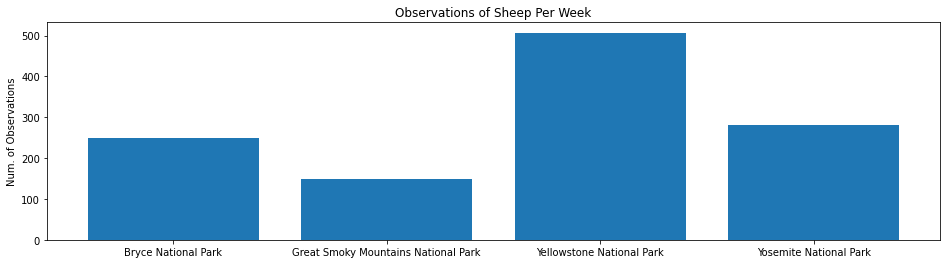

In [73]:
plt.figure(figsize=(16, 4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park.observations)), obs_by_park.observations)
ax.set_xticks(range(len(obs_by_park.observations)))
ax.set_xticklabels(obs_by_park.park_name)
plt.ylabel('Num. of Observations')
plt.title('Observations of Sheep Per Week')
plt.show()